In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from numpy import *
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [4]:
dataset=datasets.load_breast_cancer()
x_train,x_test,y_train,y_test=train_test_split(dataset.data,dataset.target,test_size=0.2,random_state=0)
y_train.shape

(455,)

1 0.9142857142857144
3 0.9318681318681319
5 0.9318681318681319
7 0.9274725274725275
9 0.9252747252747253
11 0.9230769230769231
13 0.9142857142857143
15 0.9164835164835164
17 0.9164835164835164
19 0.9142857142857143
21 0.9098901098901099
23 0.9054945054945055
25 0.9054945054945055


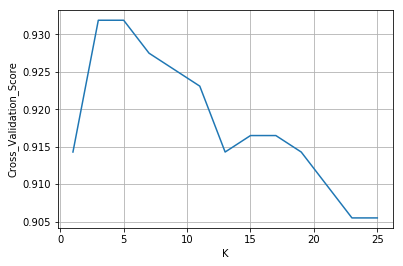

In [28]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    clf=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(clf,x_train,y_train,cv=KFold(5,True,0))
    x_axis.append(i)
    y_axis.append(score.mean())
    print(i,score.mean())
plt.plot(x_axis,y_axis)
plt.xlabel("K")
plt.ylabel("Cross_Validation_Score")
plt.grid()
plt.show()
#as u can see, score would be max if K=3

In [29]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf.score(x_test,y_test)

0.9122807017543859

In [30]:
def predict_single_point(x_train,y_train,x_test,k):
    distances=[]
    result={}
    for i in range(x_train.shape[0]):
        x_train_cur=x_train[i,:]
        distances.append([((((x_train_cur-x_test)**2).sum())**(0.5)),i])
        result[y_train[i]]=0
    distances=sorted(distances)
    for i in range(k):
        index=distances[i][1]
        result[y_train[index]]+=1
    count_max=0
    max_class=-1                        #dummy value
    for i in result.keys():
        if result[i]>count_max:
            count_max=result[i]
            max_class=i
    return max_class

In [31]:
def predict(x_train,y_train,x_test,k):
    y_pred=[]
    for i in x_test:
        y_pred.append(predict_single_point(x_train,y_train,i,k))
    return array(y_pred)

In [32]:
y_pred=predict(x_train,y_train,x_test,3)
print(y_pred)
accuracy_score(y_test,y_pred)

[0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1]


0.9122807017543859